In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [8]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [18]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections[inspections.business_id==10].head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled


In [17]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations[violations.business_id==10].head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [25]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
business_inspections = pd.merge(businesses, inspections, on = 'business_id')
restaurant_scores = pd.merge(business_inspections, violations, on = ['business_id', 'date'])
restaurant_scores[restaurant_scores.business_id==10].head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,103129,Moderate Risk,Insufficient hot water or running water
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,103144,Low Risk,Unapproved or unmaintained equipment or utensils
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled,103154,Low Risk,Unclean or degraded floors walls or ceilings
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114,Routine - Unscheduled,103145,Low Risk,Improper storage of equipment utensils or linens


In [21]:
# 2 Which ten business have had the most inspections?
restaurant_scores.name.value_counts().head(10)

Peet's Coffee & Tea          119
KENTUCKY FRIED CHICKEN        69
Lers Ros Thai Noodle          67
Whole Foods Market            66
King of Thai Noodle House     64
Specialty's Cafe & Bakery     64
Hakka Restaurant              63
Starbucks Coffee              60
Cafe Bakery                   59
Happy Donut                   58
Name: name, dtype: int64

In [22]:
# 3 Group and count the inspections by type
restaurant_scores.type.value_counts()

Routine - Unscheduled              38905
Complaint                           2004
Reinspection/Followup               1170
New Ownership                       1120
Non-inspection site visit            208
Foodborne Illness Investigation      188
Routine - Scheduled                   60
New Construction                      45
Structural Inspection                 41
Complaint Reinspection/Followup       12
Name: type, dtype: int64

In [8]:
restaurant_scores.date.describe()

count    4.375300e+04
mean     2.014227e+07
std      9.090066e+03
min      2.013041e+07
25%      2.013121e+07
50%      2.014062e+07
75%      2.015043e+07
max      2.016040e+07
Name: date, dtype: float64

In [40]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
from datetime import datetime

def date_parse(x):
    try:
        return datetime.strptime(str(x), '%Y%m%d')
    except ValueError:
        pass

restaurant_scores['date_inspected'] = restaurant_scores.date.apply(date_parse)
restaurant_scores.date_inspected.head(5)

0   2014-07-29
1   2014-07-29
2   2014-01-14
3   2014-01-14
4   2014-01-14
Name: date_inspected, dtype: datetime64[ns]

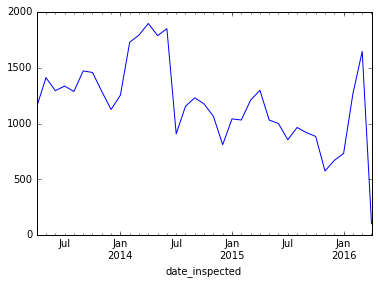

In [47]:
restaurant_scores['month'] = restaurant_scores.date_inspected.dt.month
restaurant_scores.month.head()
restaurant_scores.groupby(pd.Grouper(key = 'date_inspected', freq='1m')).count().month.plot()

In [34]:
# 5 Which zip code contains the most high risk violations?
restaurant_scores.postal_code[restaurant_scores.risk_category== 'High Risk'].value_counts().head()

94133    618
94103    569
94110    556
94122    460
94109    459
Name: postal_code, dtype: int64

In [35]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
restaurant_scores.risk_category[restaurant_scores.type == 'New Ownership'].value_counts()
#More likely to be lower risk

Low Risk         553
Moderate Risk    419
High Risk        148
Name: risk_category, dtype: int64

In [13]:
# 7 Examining the descriptions, what is the most common violation?
restaurant_scores.description.value_counts().head(10)

Unclean or degraded floors walls or ceilings                          3746
Moderate risk food holding temperature                                2862
Inadequate and inaccessible handwashing facilities                    2689
Unapproved or unmaintained equipment or utensils                      2598
Wiping cloths not clean or properly stored or inadequate sanitizer    2504
Unclean nonfood contact surfaces                                      2461
Inadequately cleaned or sanitized food contact surfaces               2452
Improper food storage                                                 2334
Foods not protected from contamination                                2028
High risk food holding temperature                                    1711
Name: description, dtype: int64

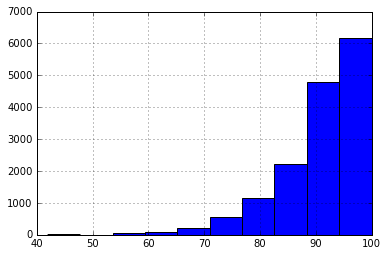

In [42]:
# 8 Create a hist of the scores with 10 bins
business_inspections.Score.hist(bins=10)

In [14]:
# 9 Can you predict risk category based on the other features in this dataset?
# What do we consider "risky"? How many violations per restaurants?
X = restaurant_scores[]
y = restaurant_scores.risk_category

Low Risk         22690
Moderate Risk    14790
High Risk         6261
Name: risk_category, dtype: int64

In [89]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/
import requests
access_token = '36748761.1677ed0.0fc4d26dec6b44719c5e83d1bb9017bb'
#r = requests.get('https://api.instagram.com/v1/locations/search?lat='+lat+'&lng='+longi+'&access_token='+access_token+'')
r = requests.get('https://api.instagram.com/v1/locations/search?lat=122.403816&lng=-122.403816&access_token='+access_token+'')


In [90]:
r.json()

{u'meta': {u'code': 400,
  u'error_message': u'This client has not been approved to access this resource.',
  u'error_type': u'OAuthPermissionsException'}}

In [ ]:
############################
### A Little More Morbid ###
############################

In [49]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [50]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns = {'lawenforcementagency' : 'agency', 'raceethnicity': 'race'}, inplace = True)
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [51]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [52]:
# 3. replace each null value in the dataframe with the string "Unknown"
#killings.streetaddress = [i.replace(NaN, 'Unknown') for i in killings.streetaddress]
killings.fillna('Unknown', inplace=True)
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [53]:
# 4. How many killings were there so far in 2015?
killings[killings.year==2015].shape[0]

467

In [54]:
# 5. Of all killings, how many were male and how many female?
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [55]:
# 6. How many killings were of unarmed people?
killings.armed[killings.armed == 'No'].value_counts()

No    102
Name: armed, dtype: int64

In [56]:
# 7. What percentage of all killings were unarmed?
killings.armed[killings.armed == 'No'].value_counts() / killings.shape[0]

No    0.218415
Name: armed, dtype: float64

In [57]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [58]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

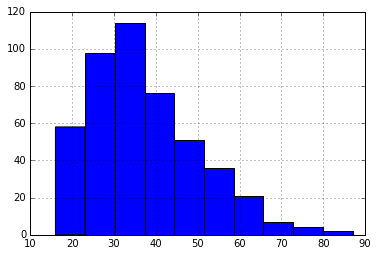

In [59]:
# 10. Display a histogram of ages of all killings
killings.age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d213f90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d69ba10>]], dtype=object)

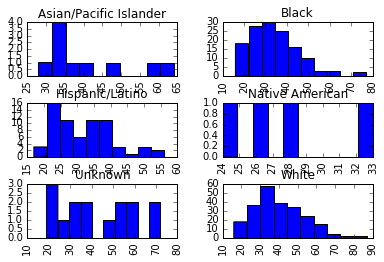

In [64]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race)

In [76]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

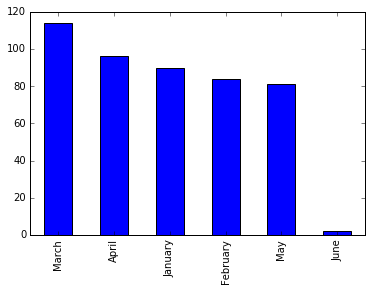

In [79]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar')

In [ ]:
###################
### Less Morbid ###
###################

In [3]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [4]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(['Employed_full_time_year_round', 'Major_code'],axis=1, inplace=True)
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [71]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [76]:
# 3. What are the top 10 highest paying majors?
majors.sort_values(by = 'Median').tail(10)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
51,51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,0,0.000000,85000,55000,125000.0
45,45,CHEMICAL ENGINEERING,Engineering,188046,131697,6388,0.046261,86000,60000,120000.0
48,48,ELECTRICAL ENGINEERING,Engineering,671647,489965,26064,0.050509,88000,60000,116000.0
97,97,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,150,0.024900,92000,53000,136000.0
56,56,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,366,0.047032,92000,52000,124000.0
58,58,NUCLEAR ENGINEERING,Engineering,9826,7320,527,0.067159,95000,65000,128000.0
55,55,METALLURGICAL ENGINEERING,Engineering,12818,6939,326,0.044873,96000,65000,123000.0
57,57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,449,0.040309,97000,60000,125000.0
154,154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,4414,0.034358,106000,78000,125000.0
59,59,PETROLEUM ENGINEERING,Engineering,19631,14002,617,0.042205,125000,75000,210000.0


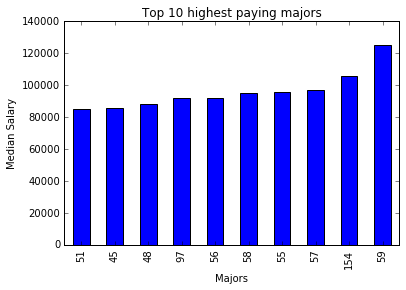

In [5]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors.Median.sort_values().tail(10).plot(kind = 'bar', by = 'Major', title = 'Top 10 highest paying majors')
plt.xlabel('Majors')
plt.ylabel('Median Salary')


In [93]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [97]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.mean().sort_values().tail(5)

Major_category
Health                     56458.333333
Business                   60615.384615
Physical Sciences          62400.000000
Computers & Mathematics    66272.727273
Engineering                77758.620690
Name: Median, dtype: float64

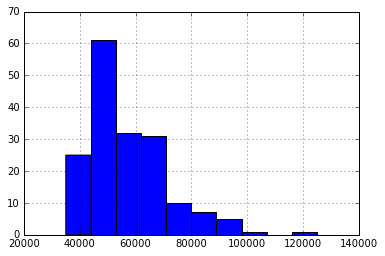

In [79]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist()

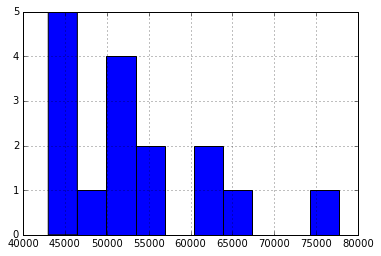

In [155]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.groupby('Major_category').Median.mean().hist()

In [132]:
# 9. What are the top 10 most UNemployed majors?
majors.sort_index(by = 'Unemployed', ).tail(10)


/anaconda/envs/datascience/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
78,78,BIOLOGY,Biology & Life Science,839454,583079,36757,0.059301,51000,35000,80000.0
25,25,GENERAL EDUCATION,Education,1438867,843693,38742,0.043904,43000,32000,59000.0
132,132,POLITICAL SCIENCE AND GOVERNMENT,Social Science,748956,541630,40376,0.069374,58000,38000,90000.0
164,164,MARKETING AND MARKETING RESEARCH,Business,1114624,890125,51839,0.055033,56000,38500,90000.0
73,73,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,1098647,708882,52248,0.068645,50000,32900,75000.0
13,13,COMMUNICATIONS,Communications & Journalism,987676,790696,54390,0.064360,50000,35000,80000.0
159,159,ACCOUNTING,Business,1779219,1335825,75379,0.053415,65000,42500,100000.0
114,114,PSYCHOLOGY,Psychology & Social Work,1484075,1055854,79066,0.069667,45000,31000,68000.0
158,158,GENERAL BUSINESS,Business,2148712,1580978,85626,0.051378,60000,40000,95000.0
161,161,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,3123510,2354398,147261,0.058865,58000,39500,86000.0


In [131]:
# What are the unemployment rates?
majors[['Major', 'Unemployment_rate', 'Unemployed']].sort_values(by = 'Unemployed').tail(10)

,Major,Unemployment_rate,Unemployed
78,BIOLOGY,0.059301,36757
25,GENERAL EDUCATION,0.043904,38742
132,POLITICAL SCIENCE AND GOVERNMENT,0.069374,40376
164,MARKETING AND MARKETING RESEARCH,0.055033,51839
73,ENGLISH LANGUAGE AND LITERATURE,0.068645,52248
13,COMMUNICATIONS,0.064360,54390
159,ACCOUNTING,0.053415,75379
114,PSYCHOLOGY,0.069667,79066
158,GENERAL BUSINESS,0.051378,85626
161,BUSINESS MANAGEMENT AND ADMINISTRATION,0.058865,147261


In [140]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category').Unemployed.mean().sort_values().tail(10)


Major_category
Health                          6251.083333
Computers & Mathematics         7270.363636
Education                       7833.500000
Law & Public Policy             8609.800000
Psychology & Social Work       11578.444444
Humanities & Liberal Arts      11942.400000
Arts                           13015.625000
Social Science                 14683.333333
Communications & Journalism    25299.750000
Business                       33415.153846
Name: Unemployed, dtype: float64

In [86]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors.Employed / majors.Total
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


In [87]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployement_rate'] = 1 - majors.sample_employment_rate
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployement_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
